In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#checking the shape of data set
df.shape

(7043, 21)

There are 7043 rows and 21 columns in a dataset

In [4]:
#checking the datatype of each column 
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Senior citizen and tenure are int type,monthly charges in float type and rest are in object type.

In [4]:
#lets convert TotalCharges to numeric data
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [5]:
#checking for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

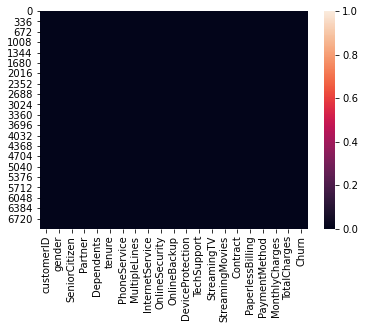

In [6]:
#checking null values using heat map
sns.heatmap(df.isnull())

In [7]:
#Lets replace null values from column TotalCharges with the mean value of that column
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [8]:
#Lets again chcek null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
#droping customer_id
df.drop("customerID",axis=1,inplace=True)

In [11]:
#checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
#extracting object type
cat=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        cat.append(x)
cat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [13]:
#checking the value counts in all the object type variable
for col in cat:
    print(col)
    print(df[col].value_counts())
    print()

gender
Male      3555
Female    3488
Name: gender, dtype: int64

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    152

In [14]:
#extracting not object type
ncat=[]
for x in df.dtypes.index:
    if df.dtypes[x]!="object":
        ncat.append(x)
ncat

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [15]:
#checking the value counts in all the object type variable.
for col in ncat:
    print(col)
    print(df[col].value_counts())
    print()

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

TotalCharges
20.200000      11
2283.300441    11
19.750000       9
19.900000       8
19.650000       8
               ..
1066.150000     1
249.950000      1
8333.950000     1
7171.700000     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64



# EDA

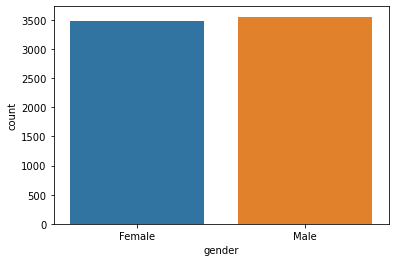

In [16]:
#gender
sns.countplot("gender", data=df)

Equal number of gender

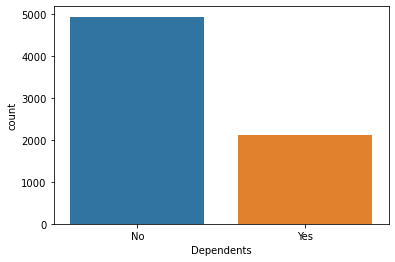

In [17]:
#Dependents
sns.countplot("Dependents", data=df)

More people has no dependents.

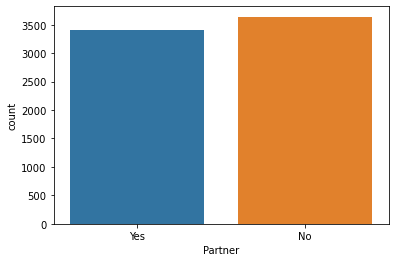

In [18]:
#Partner
sns.countplot("Partner", data=df)

the people with single and partner is nearly equal.

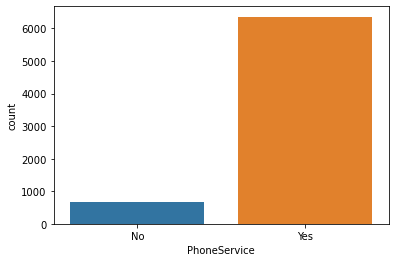

In [19]:
#PhoneService
sns.countplot("PhoneService", data=df)

Majority of people has phone services.

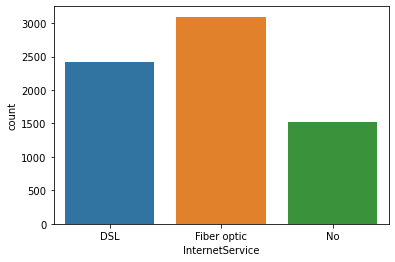

In [20]:
#InternetService
sns.countplot("InternetService", data=df)

lot of people has fiber optic internet services while some uses DSL.

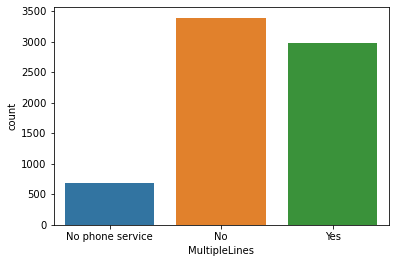

In [21]:
#MultipleLines
sns.countplot("MultipleLines", data=df)

Very few people has no phone services.More people dont have multiple lines

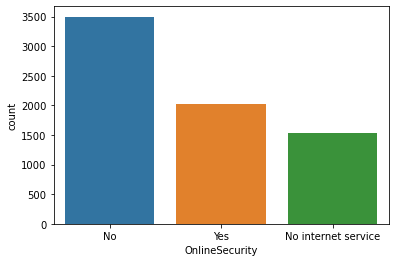

In [22]:
#OnlineSecurity
sns.countplot("OnlineSecurity", data=df)

lot of people dont have online security

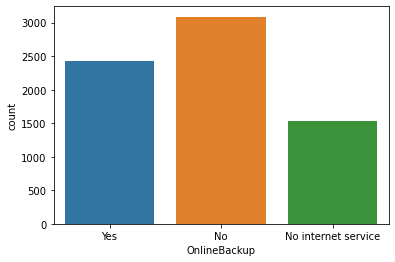

In [23]:
#OnlineBackup
sns.countplot("OnlineBackup", data=df)

 A lot of people is either with no Online backup or no internet services.

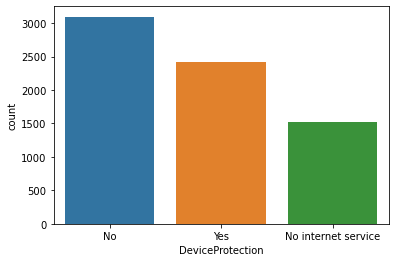

In [24]:
#DeviceProtection
sns.countplot("DeviceProtection", data=df)

Most of the people has no deviceprotection.

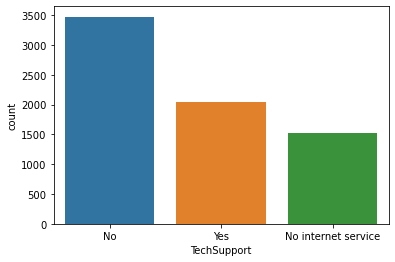

In [25]:
#TechSupport
sns.countplot("TechSupport", data=df)

lot of people dont have tech support.

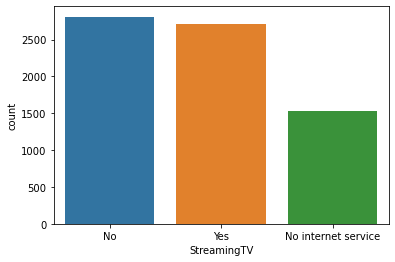

In [26]:
#StreamingTV
sns.countplot("StreamingTV", data=df)

There is good amount of people who has streaming tv.

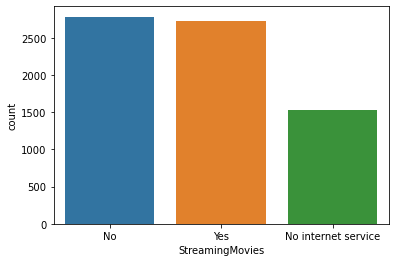

In [27]:
#StreamingMovies
sns.countplot("StreamingMovies", data=df)

There is good amount of people who has streaming movies.

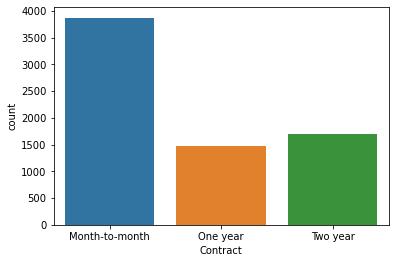

In [28]:
#Contract
sns.countplot("Contract", data=df)

Majority of people relay on month to month contract.

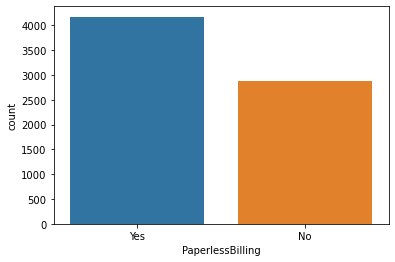

In [29]:
#PaperlessBilling
sns.countplot("PaperlessBilling", data=df)

Most people prefer paper less bills.

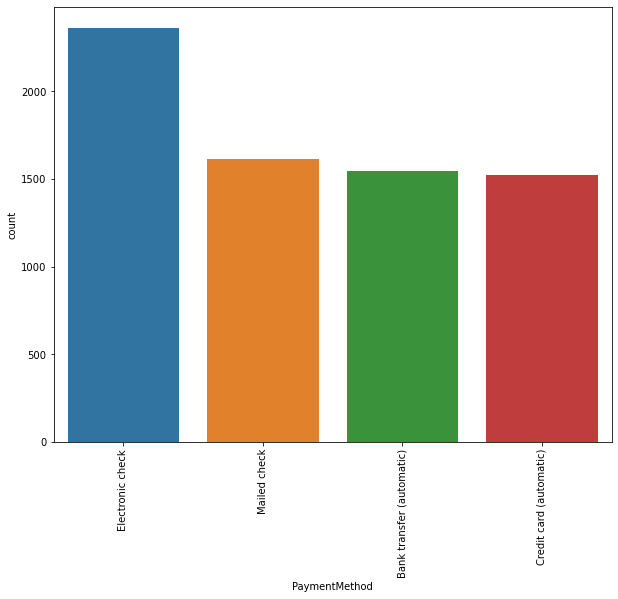

In [30]:
#PaymentMethod
plt.subplots(figsize=(10,8))
plt.xticks(rotation=90)
sns.countplot("PaymentMethod", data=df)

Electronic check is the most favored payment method.

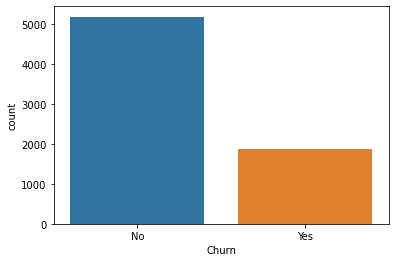

In [31]:
#Churn
sns.countplot("Churn", data=df)

1.Majority of customer churn resulted in no.
2.The dependent dataset is highly imbalanced.

In [32]:
#converting TotalCharges to float catogery
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [33]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
#Creating a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(6,4))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

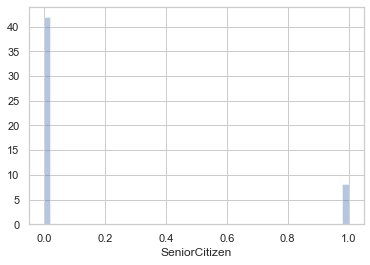

In [37]:
#SeniorCitizen
histogram(df,"SeniorCitizen")

Majority of people is not senior citizen.

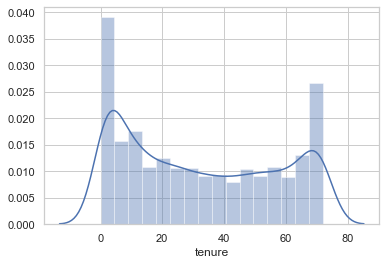

In [38]:
#tenure
histogram(df,"tenure")

The tenure goes from 0 to 70.

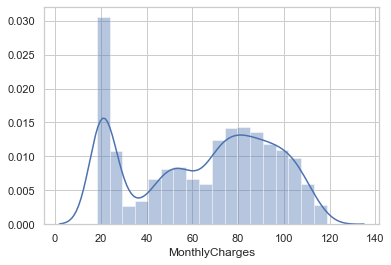

In [39]:
#MonthlyCharges
histogram(df,"MonthlyCharges")

The monthly charges lies from 20 to 120.

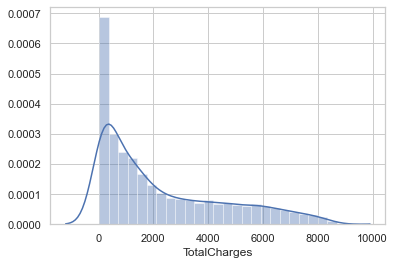

In [40]:
#TotalCharges
histogram(df,"TotalCharges")

The TotalCharges lies form 0 approx 8000.

# Bivariate Analysis

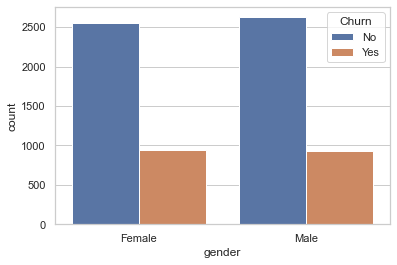

In [41]:
sns.countplot(x="gender",hue="Churn",data=df)

Gender is vey less correlated to Churn.

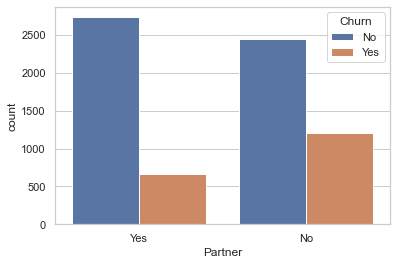

In [42]:
sns.countplot(x="Partner",hue="Churn",data=df)

The people who are single is more inclined toward churn.

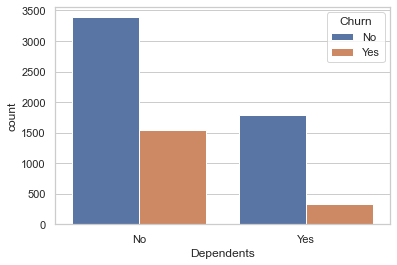

In [43]:
sns.countplot(x="Dependents",hue="Churn",data=df)

The people who are not dependent are more inclined towards churn.

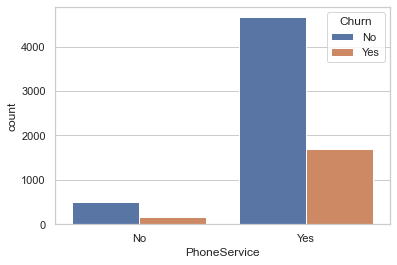

In [44]:
sns.countplot(x="PhoneService",hue="Churn",data=df)

people who have phone services are more inclined towards churn.

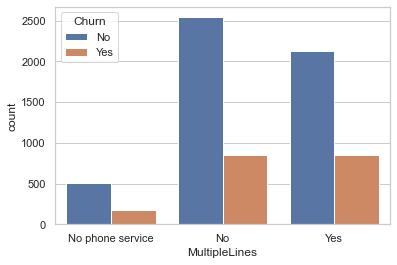

In [45]:
sns.countplot(x="MultipleLines",hue="Churn",data=df)

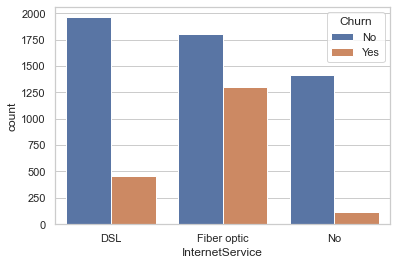

In [46]:
sns.countplot(x="InternetService",hue="Churn",data=df)

people who have fiberoptic internet servicies are more inclined towards churn.

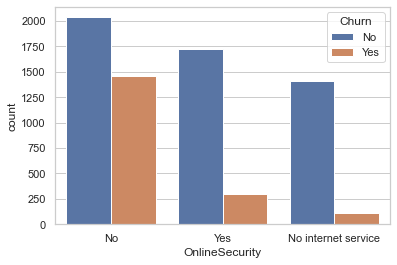

In [47]:
sns.countplot(x="OnlineSecurity",hue="Churn",data=df)

people who dont have online security are more inclined towards churn

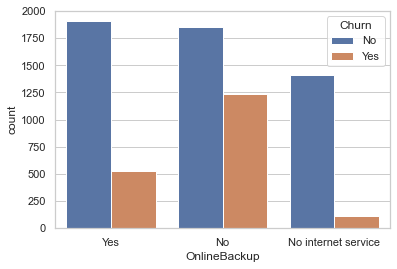

In [48]:
sns.countplot(x="OnlineBackup",hue="Churn",data=df)

people who dont have online backup are more inclined towards churn.

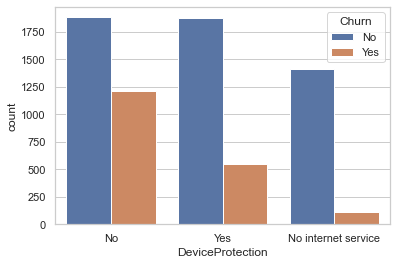

In [49]:
sns.countplot(x="DeviceProtection",hue="Churn",data=df)

people with no device protection are more inclined towards churn

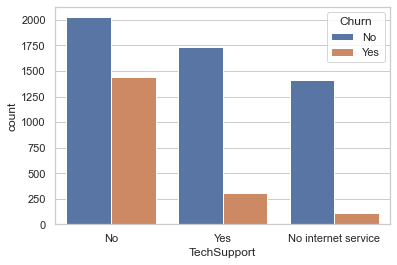

In [50]:
sns.countplot(x="TechSupport",hue="Churn",data=df)

people with no tech support are more inclined towards churn

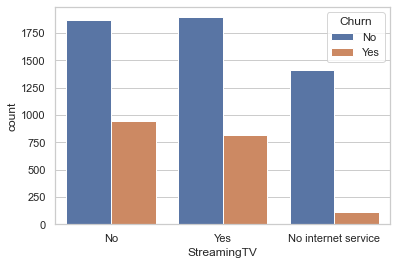

In [51]:
sns.countplot(x="StreamingTV",hue="Churn",data=df)

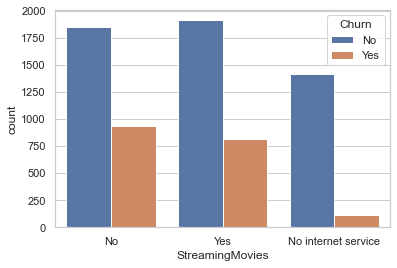

In [52]:
sns.countplot(x="StreamingMovies",hue="Churn",data=df)

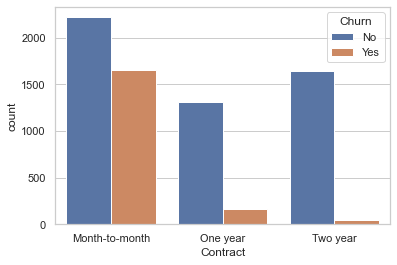

In [53]:
sns.countplot(x="Contract",hue="Churn",data=df)

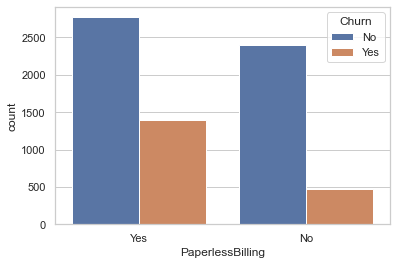

In [54]:
sns.countplot(x="PaperlessBilling",hue="Churn",data=df)

with paperlessbilling are more inclined to churn

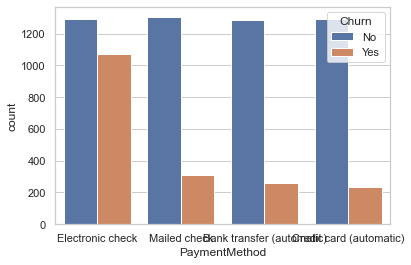

In [55]:
sns.countplot(x="PaymentMethod",hue="Churn",data=df)

people with electronic check payment method are highly inclined to churn

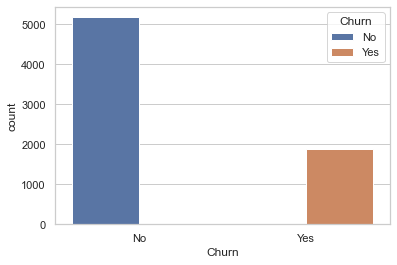

In [56]:
sns.countplot(x="Churn",hue="Churn",data=df)

# Using Label encoder to convert object type data into integer

In [57]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Dependents"]=encoder.fit_transform(df['Dependents'])
df["PhoneService"]=encoder.fit_transform(df['PhoneService'])
df["MultipleLines"]=encoder.fit_transform(df['MultipleLines'])
df["InternetService"]=encoder.fit_transform(df['InternetService'])
df["OnlineSecurity"]=encoder.fit_transform(df['OnlineSecurity'])
df["OnlineBackup"]=encoder.fit_transform(df['OnlineBackup'])
df["DeviceProtection"]=encoder.fit_transform(df['DeviceProtection'])
df["TechSupport"]=encoder.fit_transform(df['TechSupport'])
df["StreamingTV"]=encoder.fit_transform(df['StreamingTV'])
df["StreamingMovies"]=encoder.fit_transform(df['StreamingMovies'])
df["Contract"]=encoder.fit_transform(df['Contract'])
df["PaperlessBilling"]=encoder.fit_transform(df['PaperlessBilling'])
df["PaymentMethod"]=encoder.fit_transform(df['PaymentMethod'])
df["Churn"]=encoder.fit_transform(df['Churn'])
df["Partner"]=encoder.fit_transform(df['Partner'])
df["gender"]=encoder.fit_transform(df['gender'])

In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


All the object type dataset are converted into int type 

# Checking Coorelation

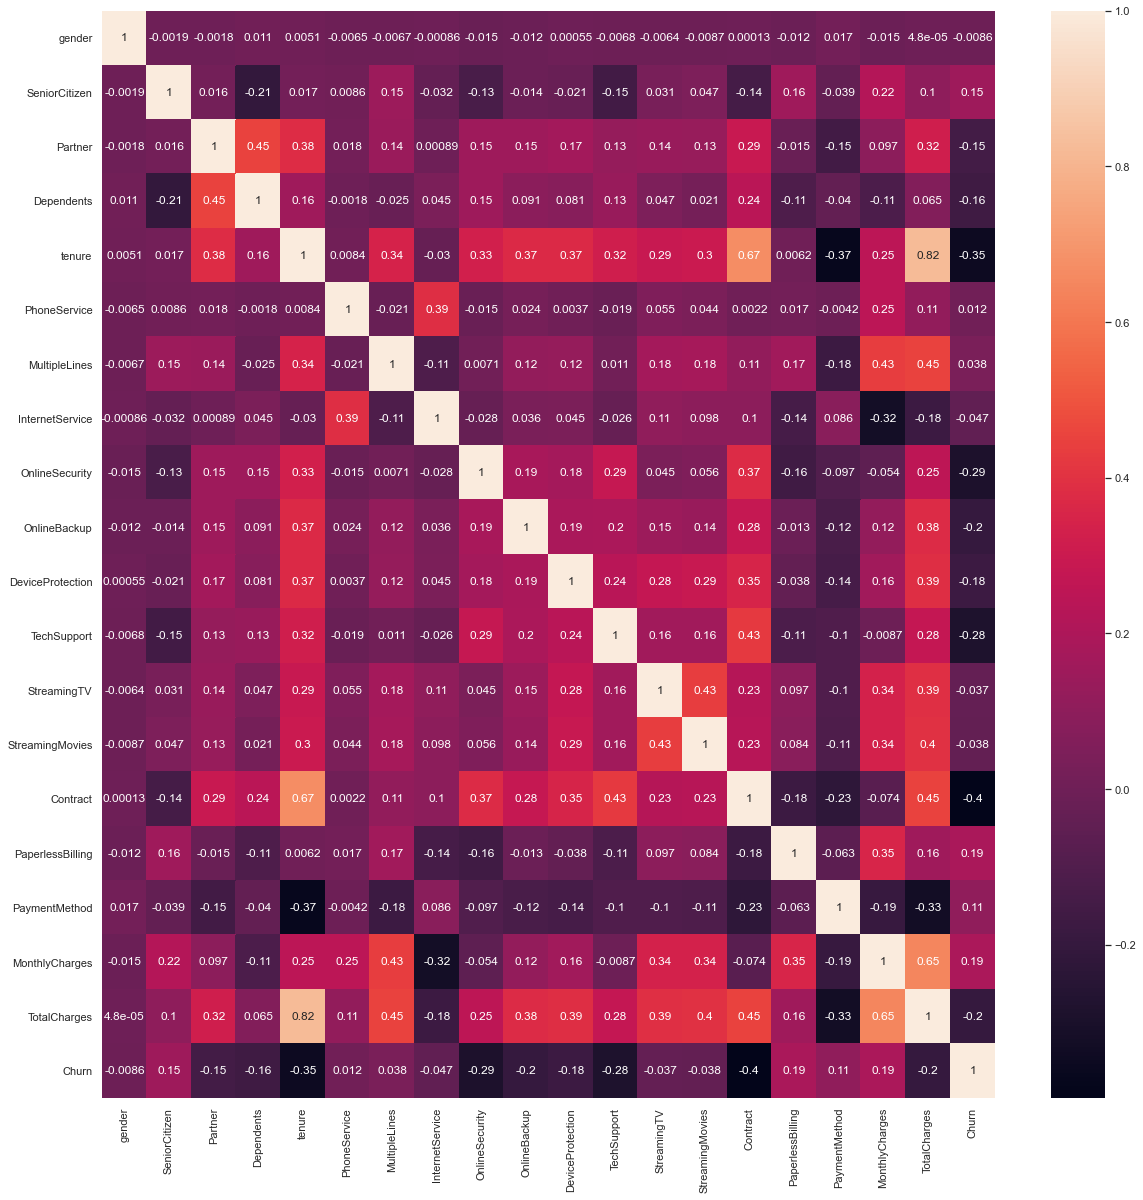

In [59]:
cor=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True)

In [60]:
#since there are to many columns, sorting correlation with attrition in descending order
df.corr()["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

Monthly charges is highly positively correlated. 
Contract is highly negatively correlated.

# Checking Outliers

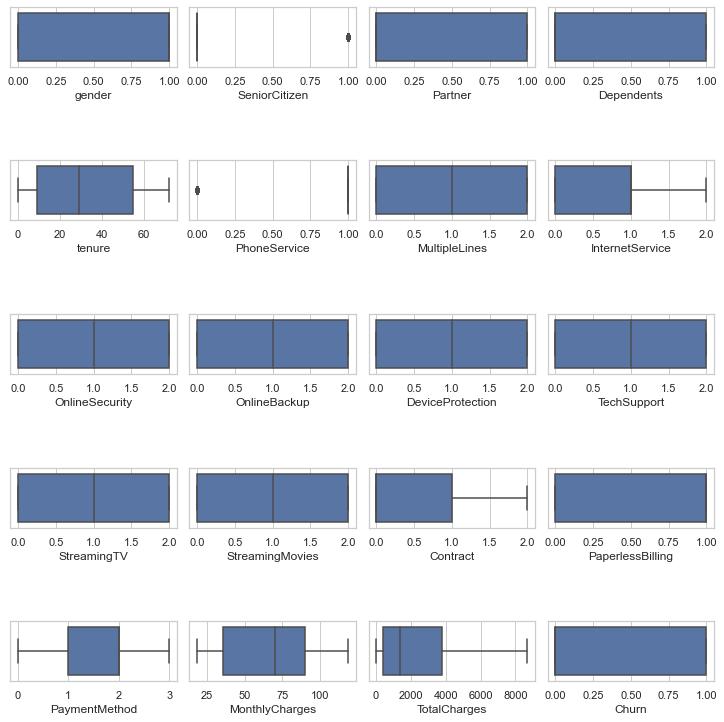

In [61]:
fig, ax=plt.subplots(ncols=4,nrows=5, figsize=(10,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

There is no outliers in a dataset.

# Skewness

In [71]:
#checking for skewness
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

# Splitting the data into input and target

In [62]:
x=df.drop('Churn',axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [63]:
y=df["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [64]:
#Treating skewness with power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
#checking for skewness
df_new.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.144899
dtype: float64

In [65]:
x=df_new

In [68]:
#check the shape
x.shape

(7043, 19)

In [66]:
#check value count for target variable
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# We can see that this is a case of imbalance, so will do oversampling

In [69]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(x,y)

In [70]:
#lets check the count of target variable now
y_over.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [77]:
#importing libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Finding Best random state

In [73]:
#Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(50,100):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.7966756861229223 on Random State 59


In [74]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 59)

# LogisticRegression model

In [78]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
accuracy = accuracy_score(y_test,predlr)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

#cross validation score
scores = cross_val_score(LR, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 79.66756861229223
roc_auc_score: 79.65304907497286
---------------------------------------------------
Confusion Matrix : 
 [[ 999  284]
 [ 242 1062]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1283
           1       0.79      0.81      0.80      1304

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587


Cross validation score : 78.04437719918839

Accuracy Score - Cross Validation Score : 1.6231914131038394


# DecisionTreeClassifier model

In [79]:
#model with DecesionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
accuracy = accuracy_score(y_test,pred_dt)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

#cross validation score
scores = cross_val_score(dt, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 78.62388867413993
roc_auc_score: 78.63095266557963
---------------------------------------------------
Confusion Matrix : 
 [[1020  263]
 [ 290 1014]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1283
           1       0.79      0.78      0.79      1304

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587


Cross validation score : 78.44117090802109


Accuracy Score - Cross Validation Score : 0.1827177661188415


# RandomForestClassifier model

In [80]:

#model with RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
accuracy = accuracy_score(y_test,pred_rf)*100

print(f"Accuracy Score:", accuracy)
print(f"\nroc_auc_score: {roc_auc_score(y_test,pred_rf)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

#cross validation score
scores = cross_val_score(rf, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 85.89099342868187

roc_auc_score: 85.88598424895638
---------------------------------------------------
Confusion Matrix : 
 [[1094  189]
 [ 176 1128]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1283
           1       0.86      0.87      0.86      1304

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587


Cross validation score : 85.20578682786848


Accuracy Score - Cross Validation Score : 0.6852066008133875


# KNeighborsClassifier model

In [81]:
#model with KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
accuracy = accuracy_score(y_test,pred_kn)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

#cross validation score
scores = cross_val_score(kn, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 79.24236567452648
roc_auc_score: 79.15658516991904
---------------------------------------------------
Confusion Matrix : 
 [[ 880  403]
 [ 134 1170]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.69      0.77      1283
           1       0.74      0.90      0.81      1304

    accuracy                           0.79      2587
   macro avg       0.81      0.79      0.79      2587
weighted avg       0.81      0.79      0.79      2587


Cross validation score : 79.31992164059744


Accuracy Score - Cross Validation Score : -0.07755596607096038


# XGBClassifier model

In [82]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_xgb)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

#cross validation score
scores = cross_val_score(xgb, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 84.80865867800541
roc_auc_score: 84.81864064763855
---------------------------------------------------
Confusion Matrix : 
 [[1104  179]
 [ 214 1090]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1283
           1       0.86      0.84      0.85      1304

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587


Cross validation score : 83.38954382966402

Accuracy Score - Cross Validation Score : 1.419114848341394


# ExtraTreesClassifier model

In [83]:
#lets check with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
pred_ext = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_ext)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_ext)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_ext)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_ext)}")

#cross validation score
scores = cross_val_score(ext, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 84.80865867800541
roc_auc_score: 84.81864064763855
---------------------------------------------------
Confusion Matrix : 
 [[1104  179]
 [ 214 1090]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1283
           1       0.86      0.84      0.85      1304

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587


Cross validation score : 86.97404286418093

Accuracy Score - Cross Validation Score : -2.1653841861755154


# AUC & ROC Curve

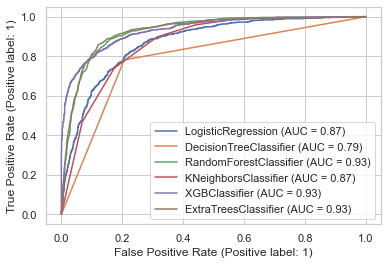

<Figure size 1440x1440 with 0 Axes>

In [84]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(ext, x_test, y_test, ax = disp.ax_)
plt.figure(figsize = (20,20))
plt.show()

# Hyperparameter Tuning

In [85]:
#lets selects different parameters for tuning
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[700,900,1000,1200]
                }

In [86]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 20, 22],
                         'n_estimators': [700, 900, 1000, 1200]})

In [87]:
#printing the best parameters found by GridSearchCV
GCV.best_params_ 

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 700}

In [88]:
#lets check the results of final model with best parameters
model = RandomForestClassifier(criterion = 'entropy', max_depth = 20,   n_estimators = 700)
model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("------------------------------------------------------------------------")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score: 86.12292230382683%
--------------------------------------------------------
roc_auc_score: 86.11667320170804%
--------------------------------------------------------
Confusion Matrix : 
 [[1095  188]
 [ 171 1133]]

------------------------------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1283
           1       0.86      0.87      0.86      1304

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587



# we have got improved accuracy after hyperparameter tuning.

--------------------------------------------------------------------------------------

# AUC ROC CURVE for final model

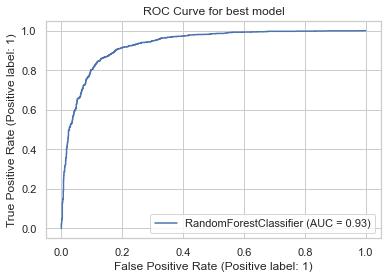

In [90]:
plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve for best model')
plt.show()

After hyperparameter tuning we got improvement in roc curve and AUC also

# Saving  the Model

In [91]:
import joblib
joblib.dump(model,"Customer_churn.pkl")

['Customer_churn.pkl']